## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], reg = 'L1', ratio = 1e-3):
    input_layer = keras.layers.Input(input_shape)
    
#     判別正規化類型
    if reg == 'L1':
        reger = l1(ratio)
    elif reg == 'L2':
        reger = l2(ratio)
    else:
        reger = l1_l2(ratio)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=reger)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=reger)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
reg_type = ['L1', 'L2', 'L1_L2']

for item in reg_type:
    #     判別正規化類型
    if item == 'L1':
        EXP = L1_EXP
    elif item == 'L2':
        EXP = L2_EXP
    else:
        EXP = L1_L2_EXP
        
    for regulizer_ratio in EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('TYPE = ', item)
        print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], ratio=regulizer_ratio, reg = item)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "%s-%s" % (str(item), str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-accuracy': train_acc,
                                 'valid-accuracy': valid_acc}

TYPE =  L1
Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - 

196/196 [==============================] - 3s 17ms/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4628 - val_accuracy: 0.1000
TYPE =  L1
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___

196/196 [==============================] - 3s 16ms/step - loss: 2.6737 - accuracy: 0.6263 - val_loss: 2.9157 - val_accuracy: 0.5344
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 2.6377 - accuracy: 0.6279 - val_loss: 2.9479 - val_accuracy: 0.5188
TYPE =  L1
Experiment with Regulizer = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
o

196/196 [==============================] - 3s 17ms/step - loss: 0.9004 - accuracy: 0.6846 - val_loss: 1.3997 - val_accuracy: 0.5286
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8847 - accuracy: 0.6891 - val_loss: 1.4199 - val_accuracy: 0.5280
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8741 - accuracy: 0.6912 - val_loss: 1.4312 - val_accuracy: 0.5235
TYPE =  L1
Experiment with Regulizer = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

196/196 [==============================] - 3s 17ms/step - loss: 0.9092 - accuracy: 0.6802 - val_loss: 1.3651 - val_accuracy: 0.5360
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8972 - accuracy: 0.6854 - val_loss: 1.3832 - val_accuracy: 0.5331
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8880 - accuracy: 0.6891 - val_loss: 1.4295 - val_accuracy: 0.5203
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8729 - accuracy: 0.6940 - val_loss: 1.3729 - val_accuracy: 0.5384
TYPE =  L2
Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

196/196 [==============================] - 3s 17ms/step - loss: 1.6234 - accuracy: 0.5199 - val_loss: 1.6991 - val_accuracy: 0.4770
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6199 - accuracy: 0.5207 - val_loss: 1.7107 - val_accuracy: 0.4912
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6202 - accuracy: 0.5196 - val_loss: 1.7003 - val_accuracy: 0.4922
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6161 - accuracy: 0.5217 - val_loss: 1.6820 - val_accuracy: 0.4955
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6099 - accuracy: 0.5239 - val_loss: 1.7016 - val_accuracy: 0.4891
TYPE =  L2
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_______________________________

196/196 [==============================] - 3s 17ms/step - loss: 1.0711 - accuracy: 0.6721 - val_loss: 1.5791 - val_accuracy: 0.5180
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0574 - accuracy: 0.6770 - val_loss: 1.5246 - val_accuracy: 0.5339
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0468 - accuracy: 0.6813 - val_loss: 1.5190 - val_accuracy: 0.5305
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0317 - accuracy: 0.6883 - val_loss: 1.5540 - val_accuracy: 0.5255
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0224 - accuracy: 0.6914 - val_loss: 1.5215 - val_accuracy: 0.5350
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0087 - accuracy: 0.6959 - val_loss: 1.5451 - val_accuracy: 0.5294
TYPE =  L2
Experiment with Regulizer = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)       

196/196 [==============================] - 4s 20ms/step - loss: 0.9405 - accuracy: 0.6707 - val_loss: 1.3688 - val_accuracy: 0.5342
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9260 - accuracy: 0.6766 - val_loss: 1.3700 - val_accuracy: 0.5296
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9163 - accuracy: 0.6803 - val_loss: 1.7036 - val_accuracy: 0.4563
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9052 - accuracy: 0.6858 - val_loss: 1.4148 - val_accuracy: 0.5245
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 0.8909 - accuracy: 0.6885 - val_loss: 1.3740 - val_accuracy: 0.5309
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8808 - accuracy: 0.6941 - val_loss: 1.4492 - val_accuracy: 0.5152
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 0.8688 - accuracy: 0.6968 - val_loss: 1.4056 - val_accuracy: 0.5259
TYPE

196/196 [==============================] - 3s 17ms/step - loss: 0.9559 - accuracy: 0.6639 - val_loss: 1.4959 - val_accuracy: 0.5061
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9486 - accuracy: 0.6656 - val_loss: 1.3786 - val_accuracy: 0.5322
Epoch 45/50
196/196 [==============================] - 4s 18ms/step - loss: 0.9325 - accuracy: 0.6720 - val_loss: 1.3619 - val_accuracy: 0.5286
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9192 - accuracy: 0.6778 - val_loss: 1.4305 - val_accuracy: 0.5223
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9083 - accuracy: 0.6807 - val_loss: 1.5703 - val_accuracy: 0.4830
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8959 - accuracy: 0.6864 - val_loss: 1.4548 - val_accuracy: 0.5225
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8844 - accuracy: 0.6880 - val_loss: 1.3710 - val_accuracy: 0.5400
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 2.4616 - accuracy: 0.0982 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 43/50
196/196 [==============================] - 4s 22ms/step - loss: 2.4615 - accuracy: 0.0957 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 44/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4615 - accuracy: 0.0993 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4615 - accuracy: 0.0980 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 4s 23ms/step - loss: 2.4615 - accuracy: 0.0968 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 2.4614 - accuracy: 0.0964 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4614 - accuracy: 0.0966 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 4s 23ms/step - loss: 1.7880 - accuracy: 0.4692 - val_loss: 1.8372 - val_accuracy: 0.4528
Epoch 42/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7826 - accuracy: 0.4696 - val_loss: 1.8036 - val_accuracy: 0.4585
Epoch 43/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7787 - accuracy: 0.4690 - val_loss: 1.8055 - val_accuracy: 0.4564
Epoch 44/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7717 - accuracy: 0.4734 - val_loss: 1.7832 - val_accuracy: 0.4736
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7690 - accuracy: 0.4746 - val_loss: 1.8364 - val_accuracy: 0.4439
Epoch 46/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7676 - accuracy: 0.4754 - val_loss: 1.7988 - val_accuracy: 0.4573
Epoch 47/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7628 - accuracy: 0.4769 - val_loss: 1.8152 - val_accuracy: 0.4583
Epoc

196/196 [==============================] - 5s 24ms/step - loss: 1.6583 - accuracy: 0.5111 - val_loss: 1.7160 - val_accuracy: 0.4897
Epoch 41/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6516 - accuracy: 0.5132 - val_loss: 1.7067 - val_accuracy: 0.4891
Epoch 42/50
196/196 [==============================] - 4s 23ms/step - loss: 1.6467 - accuracy: 0.5152 - val_loss: 1.6939 - val_accuracy: 0.4902
Epoch 43/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6391 - accuracy: 0.5149 - val_loss: 1.7161 - val_accuracy: 0.4882
Epoch 44/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6340 - accuracy: 0.5168 - val_loss: 1.6810 - val_accuracy: 0.4976
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6310 - accuracy: 0.5171 - val_loss: 1.6922 - val_accuracy: 0.4981
Epoch 46/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6242 - accuracy: 0.5194 - val_loss: 1.6863 - val_accuracy: 0.4939
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 1.6691 - accuracy: 0.5075 - val_loss: 1.7354 - val_accuracy: 0.4820
Epoch 40/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6611 - accuracy: 0.5075 - val_loss: 1.7157 - val_accuracy: 0.4814
Epoch 41/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6529 - accuracy: 0.5122 - val_loss: 1.6990 - val_accuracy: 0.4949
Epoch 42/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6472 - accuracy: 0.5135 - val_loss: 1.6905 - val_accuracy: 0.4994
Epoch 43/50
196/196 [==============================] - 4s 23ms/step - loss: 1.6428 - accuracy: 0.5141 - val_loss: 1.6841 - val_accuracy: 0.4981
Epoch 44/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6353 - accuracy: 0.5144 - val_loss: 1.7209 - val_accuracy: 0.4771
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6304 - accuracy: 0.5167 - val_loss: 1.6818 - val_accuracy: 0.4990
Epoc

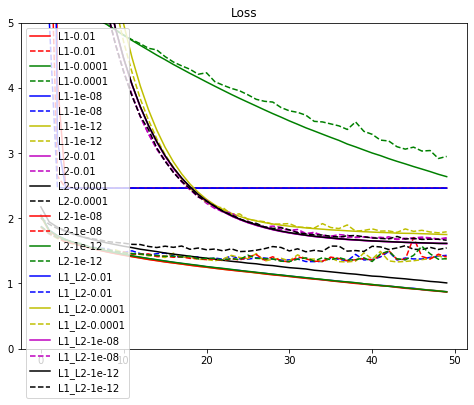

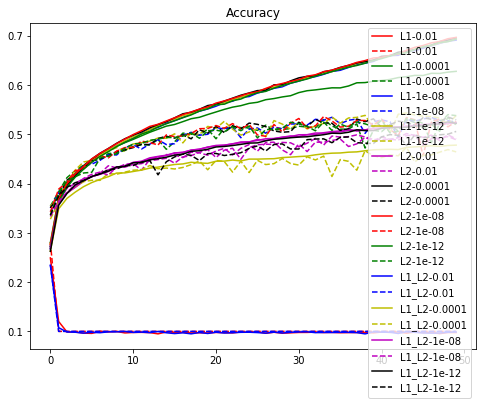

In [9]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

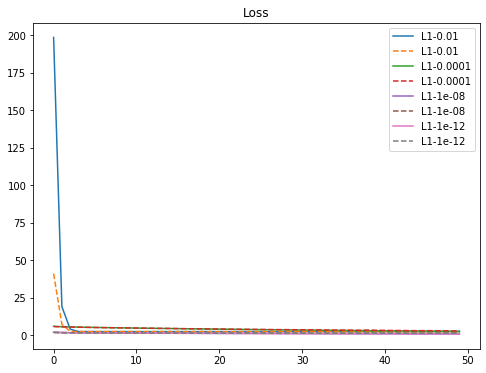

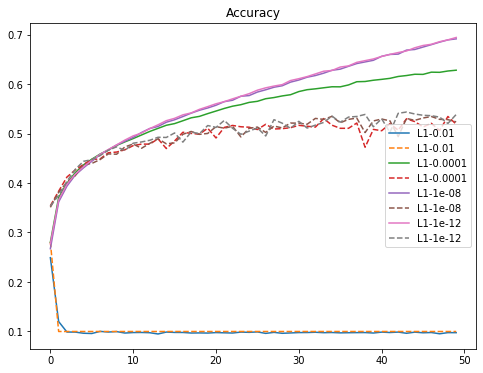

In [12]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

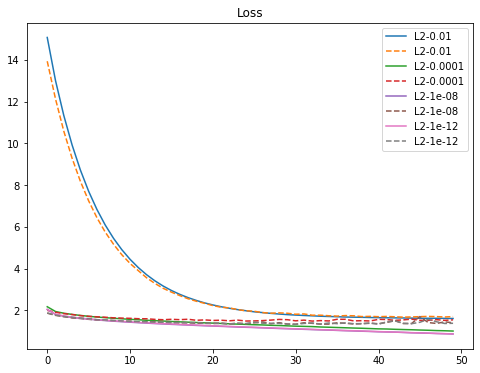

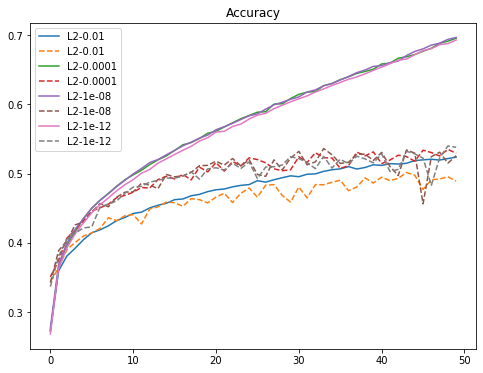

In [13]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

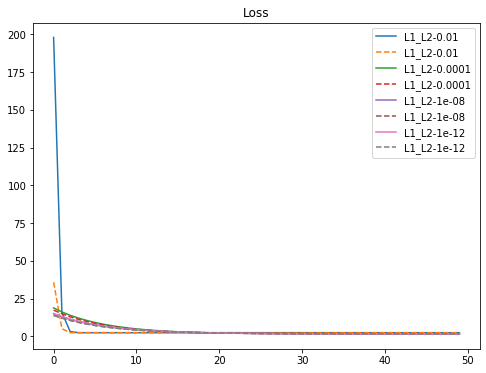

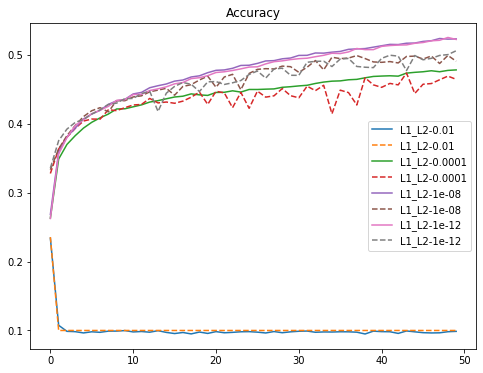

In [14]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,6,7]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,6,7]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

無論是哪種，LR太高都會失敗